In [7]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style('whitegrid')
%matplotlib inline
sns.set_context("paper")
"""数据加载"""
house = pd.read_excel('house.xls', index_col=None)
house=house[~house['height'].isin(['10层1994年建板', '11层2002年建板塔结合', '15层2003年建塔', '16层2002年建板塔结合',
       '17层2003年建板塔结合', '1层2001年建板塔结合', '1层2013年建板', '1层2014年建板',
       '20层2003年建塔', '21层2011年建板', '23层2011年建板', '26层2009年建板塔结合',
       '27层2011年建板塔结合', '30层2010年建板', '32层2013年建板塔结合', '33层1996年建塔',
       '6层1998年建板', '7层1993年建板', '8层2001年建板塔结合', '8层2009年建板塔结合',
       '9层1997年建板塔结合', '9层2011年建板'])]
house.head()

,totalprice,unitprice,position,rooms,size,orientation,decoration,elevator,area,height,year,buildtype,follow,city
0,920.0,77188,天悦龙庭二期,3室2厅,119.19,西南,精装,有电梯,宝安中心,中,2005,塔楼,13,宝安
1,340.0,51909,大益广场,2室2厅,65.50,西南,精装,有电梯,西乡,低,2002,板塔结合,160,宝安
2,660.0,73884,中熙香缇湾,4室2厅,89.33,西南,精装,有电梯,西乡,中,2009,板塔结合,226,宝安
3,1150.0,76657,深业新岸线三期,4室1厅,150.02,东南,精装,有电梯,宝安中心,中,2008,塔楼,29,宝安
4,570.0,52127,碧海富通城一期,3室2厅,109.35,南,精装,有电梯,碧海,中,2006,板塔结合,54,宝安


In [8]:
# 分割户型
huxing_split = pd.DataFrame((re.split('["室","厅"]',x) for x in house.rooms),index=house.index,columns=['main_room','sub_room', 'a'])
huxing_split.drop(['a'],axis=1,inplace=True)
huxing_split['main_room']=pd.to_numeric(huxing_split['main_room'],errors='coerce')
huxing_split['sub_room']=pd.to_numeric(huxing_split['sub_room'],errors='coerce')
huxing_split.head()

,main_room,sub_room
0,3,2
1,2,2
2,4,2
3,4,1
4,3,2


In [9]:
del house['rooms']
house=pd.merge(house,huxing_split,right_index=True, left_index=True)
house.head()

,totalprice,unitprice,position,size,orientation,decoration,elevator,area,height,year,buildtype,follow,city,main_room,sub_room
0,920.0,77188,天悦龙庭二期,119.19,西南,精装,有电梯,宝安中心,中,2005,塔楼,13,宝安,3,2
1,340.0,51909,大益广场,65.50,西南,精装,有电梯,西乡,低,2002,板塔结合,160,宝安,2,2
2,660.0,73884,中熙香缇湾,89.33,西南,精装,有电梯,西乡,中,2009,板塔结合,226,宝安,4,2
3,1150.0,76657,深业新岸线三期,150.02,东南,精装,有电梯,宝安中心,中,2008,塔楼,29,宝安,4,1
4,570.0,52127,碧海富通城一期,109.35,南,精装,有电梯,碧海,中,2006,板塔结合,54,宝安,3,2


In [10]:
#用来正常显示中文标签
plt.rcParams['font.sans-serif'] = ['SimHei']
#用来正常显示负号
plt.rcParams['axes.unicode_minus'] = False

C:\Users\HASEE\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


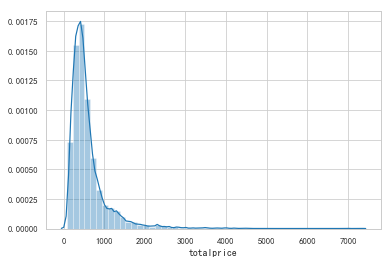

In [11]:
sns.distplot(house['totalprice'])
plt.savefig('总价分布.svg',format='svg')

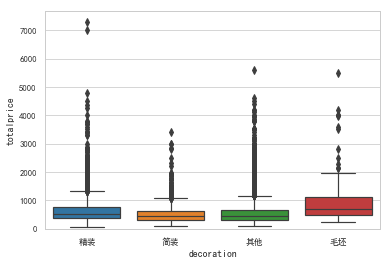

In [12]:
# 分析装修影响
var = 'decoration'
fig = sns.boxplot(x=house[var], y=house['totalprice'])
fig.axis(ymin=0);
plt.savefig('总价-装修.svg',format='svg')

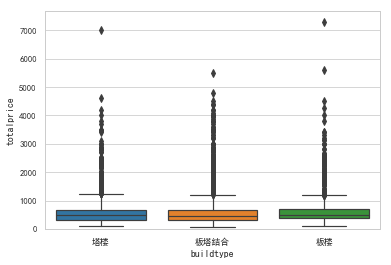

In [13]:
# 分析建筑类型影响
var = 'buildtype'
fig = sns.boxplot(x=house[var], y=house['totalprice'])
fig.axis(ymin=0);
plt.savefig('总价-建筑类型.svg',format='svg')

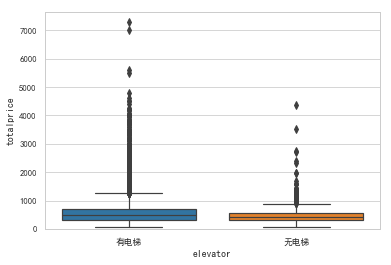

In [14]:
# 分析电梯影响
var = 'elevator'
fig = sns.boxplot(x=house[var], y=house['totalprice'])
fig.axis(ymin=0);
plt.savefig('总价-电梯.svg',format='svg')

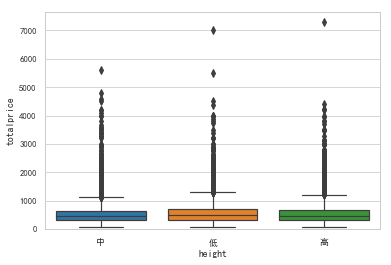

In [15]:
# 分析楼高影响
var = 'height'
fig = sns.boxplot(x=house[var], y=house['totalprice'])
fig.axis(ymin=0);
plt.savefig('总价-高度.svg',format='svg')

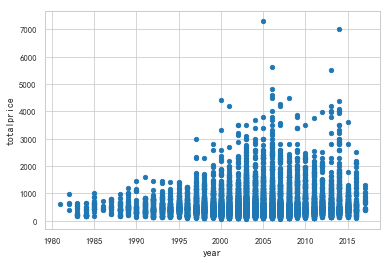

In [16]:
# 分析年份影响
house.plot(x="year", y="totalprice", kind="scatter")
plt.savefig('总价-年份.svg',format='svg')

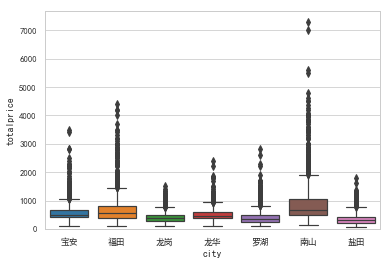

In [17]:
# 分析城市影响
var = 'city'
fig = sns.boxplot(x=house[var], y=house['totalprice'])
fig.axis(ymin=0);
plt.savefig('总价-区域.svg',format='svg')

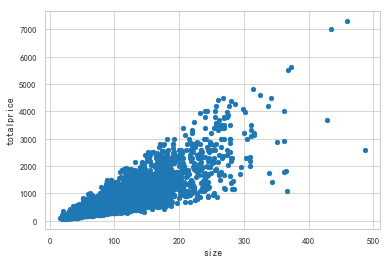

In [18]:
# 分析面积影响
house.plot(x="size", y="totalprice", kind="scatter")
plt.savefig('总价-面积.svg',format='svg')

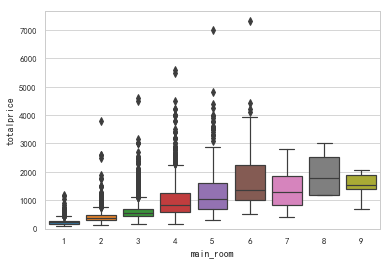

In [19]:
# 分析房间影响
var = 'main_room'
fig = sns.boxplot(x=house[var], y=house['totalprice'])
fig.axis(ymin=0);
plt.savefig('总价-房间数.svg',format='svg')

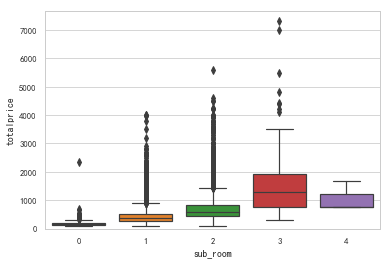

In [20]:
# 分析客厅影响
var = 'sub_room'
fig = sns.boxplot(x=house[var], y=house['totalprice'])
fig.axis(ymin=0);
plt.savefig('总价-客厅数.svg',format='svg')

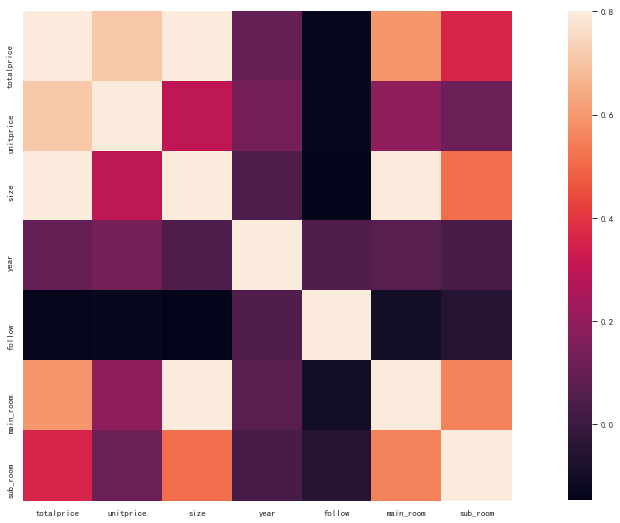

In [21]:
corrmat = house.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=0.8, square=True)
plt.savefig('相关热力图.svg',format='svg')

In [22]:
# 切分总价
totalprice = house['totalprice']
totalprice = pd.DataFrame(totalprice)
totalprice.head()

,totalprice
0,920.0
1,340.0
2,660.0
3,1150.0
4,570.0


In [23]:
# 取X
col = ['size', 'elevator', 'height', 'year', 'buildtype', 'city', 'decoration']
X = pd.DataFrame(house, columns=col)
X.head(10)

,size,elevator,height,year,buildtype,city,decoration
0,119.19,有电梯,中,2005,塔楼,宝安,精装
1,65.50,有电梯,低,2002,板塔结合,宝安,精装
2,89.33,有电梯,中,2009,板塔结合,宝安,精装
3,150.02,有电梯,中,2008,塔楼,宝安,精装
4,109.35,有电梯,中,2006,板塔结合,宝安,精装
5,118.25,有电梯,中,2009,板塔结合,宝安,简装
6,30.87,有电梯,高,2009,板楼,宝安,精装
7,93.60,有电梯,高,2001,板塔结合,宝安,其他
8,50.62,有电梯,低,2007,板塔结合,宝安,其他
9,87.20,无电梯,中,1989,板楼,宝安,其他


In [24]:
# 标签向量化-elevator
import sklearn
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
elevator = X['elevator'].tolist()
le.fit(elevator)
elevator = le.transform(X['elevator'].tolist())
elevator

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [25]:
# 标签向量化-decoration
decoration = X['decoration'].tolist()
le.fit(decoration)
decoration = le.transform(X['decoration'].tolist())
decoration

array([3, 3, 3, ..., 0, 0, 0], dtype=int64)

In [26]:
# 标签向量化-year
year = X['year'].tolist()
le.fit(year)
year = le.transform(X['year'].tolist())
year

array([24, 21, 28, ..., 30, 25, 27], dtype=int64)

In [27]:
# 标签向量化-height
height = X['height'].tolist()
le.fit(height)
height = le.transform(X['height'].tolist())
height

array([0, 1, 0, ..., 2, 1, 0], dtype=int64)

In [28]:
# 标签向量化-buildtype
buildtype = X['buildtype'].tolist()
le.fit(buildtype)
buildtype = le.transform(X['buildtype'].tolist())
buildtype

array([0, 1, 1, ..., 0, 2, 1], dtype=int64)

In [29]:
# 标签向量化-city
city = X['city'].tolist()
le.fit(city)
city = le.transform(X['city'].tolist())
city

array([1, 1, 1, ..., 2, 2, 2], dtype=int64)

In [30]:
# 已经拆分
# rooms = X['rooms'].tolist()
# le.fit(rooms)
# rooms = le.transform(X['rooms'].tolist())
# rooms

In [31]:
# X['orientation'] = orientation
house['elevator'] = elevator
house['height'] = height
house['year'] = year
house['buildtype'] = buildtype
house['city'] = city
house['decoration'] = decoration
# X['rooms'] = rooms
house.head()

,totalprice,unitprice,position,size,orientation,decoration,elevator,area,height,year,buildtype,follow,city,main_room,sub_room
0,920.0,77188,天悦龙庭二期,119.19,西南,3,1,宝安中心,0,24,0,13,1,3,2
1,340.0,51909,大益广场,65.50,西南,3,1,西乡,1,21,1,160,1,2,2
2,660.0,73884,中熙香缇湾,89.33,西南,3,1,西乡,0,28,1,226,1,4,2
3,1150.0,76657,深业新岸线三期,150.02,东南,3,1,宝安中心,0,27,0,29,1,4,1
4,570.0,52127,碧海富通城一期,109.35,南,3,1,碧海,0,25,1,54,1,3,2


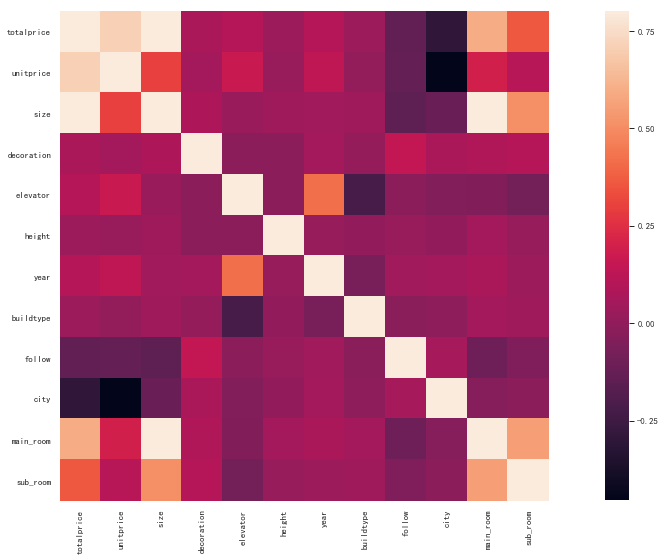

In [32]:
corrmat = house.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=0.8, square=True)
plt.savefig('相关热力图-编码后.svg',format='svg')

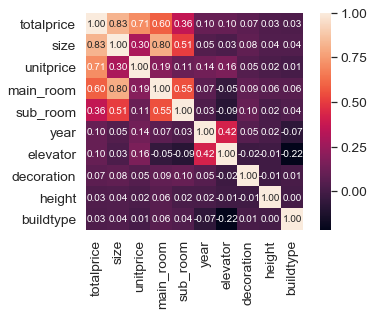

In [33]:
k  = 10 # 关系矩阵中将显示10个特征
cols = corrmat.nlargest(k, 'totalprice')['totalprice'].index
cm = np.corrcoef(house[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, \
                 square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.savefig('降序相关热力图.svg',format='svg')

In [28]:
col = ['size', 'main_room', 'sub_room', 'year', 'elevator', 'decoration']
X = pd.DataFrame(house, columns=col)
X.head(10)

,size,main_room,sub_room,year,elevator,decoration
0,119.19,3,2,24,1,3
1,65.50,2,2,21,1,3
2,89.33,4,2,28,1,3
3,150.02,4,1,27,1,3
4,109.35,3,2,25,1,3
5,118.25,3,2,28,1,2
6,30.87,1,1,28,1,3
7,93.60,3,2,20,1,0
8,50.62,2,1,26,1,0
9,87.20,3,2,8,0,0


In [29]:
# 归一化操作
from sklearn.preprocessing import MinMaxScaler
MinMaxTransformer=MinMaxScaler()
MinMaxTransformer.fit(X)
X_transformed=MinMaxTransformer.transform(X)
X_transformed

array([[0.21813266, 0.25      , 0.5       , 0.66666667, 1.        ,
        1.        ],
       [0.10384026, 0.125     , 0.5       , 0.58333333, 1.        ,
        1.        ],
       [0.15456829, 0.375     , 0.5       , 0.77777778, 1.        ,
        1.        ],
       ...,
       [0.06469261, 0.        , 0.25      , 0.83333333, 1.        ,
        0.        ],
       [0.04583191, 0.        , 0.        , 0.69444444, 1.        ,
        0.        ],
       [0.12012517, 0.125     , 0.25      , 0.75      , 1.        ,
        0.        ]])

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_transformed, totalprice, random_state=14)

In [31]:
import numpy as np
Xtrain = np.array(X_train)
ytrain = np.array(y_train)
ytrain

array([[250.],
       [800.],
       [390.],
       ...,
       [665.],
       [115.],
       [410.]])

In [32]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=400)
rf.fit(X_train, y_train.astype('int'))
predict_y=rf.predict((X_test))

count = 0
acc_count = 0
total_error = 0

C:\Users\HASEE\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\Users\HASEE\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [33]:
y_test = y_test['totalprice'].tolist()
predict_y = predict_y.tolist()

In [34]:
for y in y_test:
    error = np.abs(predict_y[count] - y)
    total_error += error
    count += 1
wc = total_error / (count+1)

In [35]:
# 平均误差值
wc

143.11920592096365